calculating with m =  2
calculating with m =  3
calculating with m =  4
calculating with m =  5
calculating with m =  6
calculating with m =  7
calculating with m =  8
calculating with m =  9


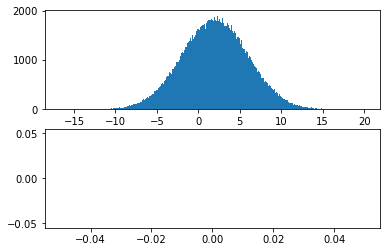

In [9]:
import numpy as np 
from matplotlib import pyplot as plt 
from numpy.random import normal
from time import time


def h(i,m,z):
    if i==1:
        return 1.0 if z<0.0 else np.max((0.0, 1.0-z))
    elif i==m:
        return np.max((0, 1.0+z)) if z<0.0 else 1.0
    else:
        return np.max((0.0, 1.0-np.abs(z)))


def to_dirac(distribution, n_output, sorted = False):
    #Create the locations
    if n_output <= 1:
        return np.mean(distribution), len(distribution)
    

    # I make the choice to have dirac's impulsion at the end of the distribution. It could be a problem if the distribution is too wide
    # If I change it, I need to decide where I put my first impulsion (it could be a % of the number of element). I won't do it if not necessary
    """if sorted:
        min_range = distribution[0]
        max_range = distribution[-1]
    else:
        min_range = np.min(distribution)
        max_range = np.max(distribution)"""
        
    #Create the locations
    if n_output <= 1:
        return np.mean(distribution), len(distribution)
    

    # I make the choice to have dirac's impulsion at the end of the distribution. It could be a problem if the distribution is too wide
    # If I change it, I need to decide where I put my first impulsion (it could be a % of the number of element). I won't do it if not necessary
    min_range = np.min(distribution)
    max_range = np.max(distribution)

    gap_size = (max_range - min_range)/ (n_output - 1)

    x_dirac = [min_range + i * gap_size for i in range(n_output)]

    y_dirac = [0 for i in x_dirac]

    #Assign value to locations
    for elt in distribution:
        for e in range(len(x_dirac)-1):
            if elt > x_dirac[e] and elt < x_dirac[e+1]:
                
                low = x_dirac[e] #m_l
                high = x_dirac[e+1] #m_u
                
                #i,m,z
                mult = h(e,len(x_dirac)-1,x_dirac[e])
                
                y_dirac[e]   += mult*((elt - low)/(high - low) )
                y_dirac[e+1] += mult*((high - elt)/(high - low) )
                
                
                break
        

    return x_dirac, y_dirac 
        


def divide_list(my_list, factor):
    if type(my_list) is list:
        return [elt/factor for elt in my_list]
    if type(my_list) is int or float:
        return my_list/factor




#To make my algorithm more efficient, i will start by ordering the distibutions. 

def verify_sim(distribution, projection, epsilon):
    #Iter in the distribution to see if it match the probability with the categorical projection
    #I do not consider the dirac's higher than the actual thresh. 
    #I know it's not perfect but I'm ok with the result and I accept this little difference because the idea behind is good enough
    size = len(distribution)
    loc, prob = projection


    index_categorical = 0
    count = 0
    count_categorical = 0


    #Iteration
    for index in range(size):
        count += 1.0 / size
        if distribution[index] > loc[index_categorical+1]:
            count_categorical += prob[index_categorical+1]
            index_categorical += 1
        
        if abs(count - count_categorical) > epsilon:
            return False
        
    return True




def find_best_dirac(epsilon, mu, var):
    #calculate dirac
    #Iter to see if the difference is under epsilon
    #if not, calculate dirac with one more m
    #repeat


    #generation of the distribution
    n_elt = 500000
    distr = [normal(mu,var) for i in range(n_elt)]
    distr.sort()
    #Finding the best m to project our distribution
    output_m = -1
    loc = []
    prob = []

    for m in range(2, 10):
        print("calculating with m = ", m)
        locations, probabilities = to_dirac(distr, m, sorted = True)
        probabilities = divide_list(probabilities, n_elt)

        if verify_sim(distr, (locations, probabilities), epsilon):
            output_m = m
            loc = locations
            prob = probabilities
            break

    
    return distr, (loc, prob)



distribution, (loc, prob) = find_best_dirac(0.2, 2, 4)

#Plot
fig, axs = plt.subplots(2)
axs[0].hist(distribution,bins=1000, zorder = 0)
axs[1].scatter(loc, prob, color = 'red')
plt.show()

